# PROBLEM SET 8


In [1]:
%%bash
tree ./

./
├── connect.dat
├── Problem Set 8.pdf
└── Solution Set 8.ipynb

0 directories, 3 files


## 1. 
Develop an application that simulates the working of Genetic Algorithm comprising of Basic Operators such as Selection, Crossover and Mutation to optimize a user input objective function. You are free to use any inbuilt / open-source packages supported in the programming platform. Ensure that the objective function involves atleast three parameters to be controlled.


In [2]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga


In [3]:
def func(X):
    """
    X: np.array
        Contains the attribute values 
    return value:
        returns an real number.
    """
    return sum([1 / (1 + np.exp(x)) for x in X])

In [4]:
"""
range for each attribute, here 4 attributes
"""
varbound=np.array([
    [0, 10],
    [0, 12],
    [0, 1],
    [10, 100]
])
varbound

array([[  0,  10],
       [  0,  12],
       [  0,   1],
       [ 10, 100]])

 The best solution found:                                                                           
 [ 9.99560056 11.96733249  0.99969259 62.94992528]

 Objective function:
 0.2690538130913817


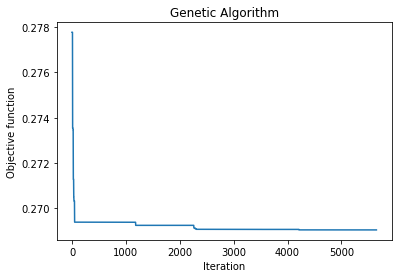

In [5]:
"""
minimize the various attributes for the objective function output
"""
model=ga(function=func,dimension=4, variable_type='real',variable_boundaries=varbound)
model.run()

In [6]:
"""
the attribute such that the objective function is minimum
"""
model.best_function

0.2690538130913817

In [7]:
"""
the minimum value of the objective function
"""
model.best_variable

array([ 9.99560056, 11.96733249,  0.99969259, 62.94992528])

## 2. 
Develop an application that learns a classifier model employing Genetic Algorithms to choose optimal split values / attributes as part of Decision Tree learning phase. You are free to make use of inbuilt / open-source packages to come up with a GA based DTree Classifier. You may test with the same example that was used to understand Decision Tree / Naive Bayes as part of class discussions.


## 3. 
Develop an application that simulates the working of Logic gates (any 5 including XOR) using perceptron based modeling. You are free to make use of any inbuilt support / open source packages to test drive the above application.


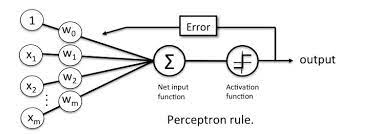

![Perceptron PseudoCode Image](https://miro.medium.com/max/1032/1*PbJBdf-WxR0Dd0xHvEoh4A.png)

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [9]:
def activation_func(x):
    """
    Input:
    x: float
    ---
    output:
    _ : float
    Function
    Step Function: if x >= 0: 1
                    else: 0
    """
    return 1 if x >= 0 else 0

In [10]:
class Perceptron:
    def __init__(self, X, y, bias= 1):
        """
        Input:
        X: 2d Array
        y: 1d Array
        ---
        Description:
        Initialize the data from and into the perceptron

        X: attribute in the training data
        y: Output of the training data
        ---
        
        """
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        self.bias = bias
        
    def predict(self, x):
        """
        Input: 
        x: np.array(dtype= float)
        ---
        Output:
        y_pred for the value of x
        """
        def _predict(x, w):
            return activation_func(np.sum(np.dot(x, self.w)))
        if x.shape != self.w.shape:
            x = np.insert(x, 0, 1)
        return _predict(x, self.w)
    
    def train(self, epochs= 100, lr= 1):
        """
        Input:
        epochs: int
        lr: float
        ---
        Perceptron Training model: The model is runs for epochs
        epochs: no of iterations the perceptron runs
        lr: learning rate
        ---
        """
        self.w = np.insert(np.array([random.randint(0, 1) for i in range(X.shape[1])]), 0, self.bias)
        for _ in range(epochs):
            for i in range(self.y.shape[0]):
                x = np.insert(self.X[i], 0, 1)
                y_pred = self.predict(x)
                err = self.y[i] - y_pred
                self.w = self.w + lr * err * x

In [11]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_and = np.array([x0 and x1 for x0, x1 in X])
y_or = np.array([x0 or x1 for x0, x1 in X])
y_nand = np.array([not(x0 and x1) for x0, x1 in X])
y_nor = np.array([not(x0 or x1) for x0, x1 in X])

and_per = Perceptron(X, y_and)
or_per = Perceptron(X, y_or)
nand_per = Perceptron(X, y_nand)
nor_per = Perceptron(X, y_nor)


In [12]:
and_per.train(100, 0.1)
or_per.train(100, 0.1)
nand_per.train(100, 0.1)
nor_per.train(100, 0.1)

In [13]:
for x in X:
    print(f"and{x} = {and_per.predict(x)}")
for x in X:
    print(f"or{x} = {or_per.predict(x)}")    
for x in X:
    print(f"nand{x} = {nand_per.predict(x)}")    
for x in X:
    print(f"nor{x} = {nor_per.predict(x)}")
print("Correct Predictions")    

and[0 0] = 0
and[0 1] = 0
and[1 0] = 0
and[1 1] = 1
or[0 0] = 0
or[0 1] = 1
or[1 0] = 1
or[1 1] = 1
nand[0 0] = 1
nand[0 1] = 1
nand[1 0] = 1
nand[1 1] = 0
nor[0 0] = 1
nor[0 1] = 0
nor[1 0] = 0
nor[1 1] = 0
Correct Predictions


In [14]:
and_per.w

array([-0.6,  0.4,  0.4])

In [15]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_xor = np.array([x0 ^ x1 for x0, x1 in X])
y_xnor = np.array([not(x0 ^ x1) for x0, x1 in X])
xor_per = Perceptron(X, y_xor)
xnor_per = Perceptron(X, y_xnor)

In [16]:
xor_per.train(100, 0.1)
xnor_per.train(100, 0.1)

In [17]:
for x in X:
    print(f"xor{x} = {xor_per.predict(x)}")
for x in X:
    print(f"xnor{x} = {xnor_per.predict(x)}")    
print("Wrong Prediction ... Unclear decision boundary")

xor[0 0] = 1
xor[0 1] = 0
xor[1 0] = 0
xor[1 1] = 0
xnor[0 0] = 0
xnor[0 1] = 1
xnor[1 0] = 1
xnor[1 1] = 1
Wrong Prediction ... Unclear decision boundary


In [18]:
def XOR_net(X):
    nand_out = [nand_per.predict(x) for x in X]
    or_out = [or_per.predict(x) for x in X]
    xor_out = [and_per.predict(np.asarray([nand_out[i], or_out[i]])) for i in range(X.shape[0])]
    return xor_out
xor_out = XOR_net(X)
for i, x in enumerate(X):
    print(f"xor{x} = {xor_out[i]}")
print("Correct Predictions")

xor[0 0] = 0
xor[0 1] = 1
xor[1 0] = 1
xor[1 1] = 0
Correct Predictions


## 4. 
Simulate the working of Back Propagation Network to learn a classifier model and generate class labels for test data set. Any built in / open-source packages could be used to test drive the above application. You may test it on classification datasets used for class discussion or any other larger data set of your choice if required to appreciate the power of neural networks in iterative learning.


## 5. 
Develop an application that simulates the working of K Means, K Medoids and Hierarchical clustering algorithms. Distance measure for the basic version could be based on Euclidean Distance. You may later test these implementations with other distance measures such as Cosine Similarity, Hamming, Minowski etc. If the platform supports these algorithms / measures or open-source packages exist.


In [19]:
from sklearn.cluster import KMeans
import numpy as np

In [20]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

## 6. 
Extend the above hierarchical implementation to perform both agglomerative and divisive analysis (AGNES / DIANA) approaches to clustering. You may also use the support for Single, Average and Complete Linkage approaches to hierarchical clustering and depict the output as Dendrograms.


## 7. 
Test drive any one Frequent Itemset Mining algorithm other than FPGrowth which was discussed on Hadoop / Pyspark platform. You may use built in support / open source packages as part of any user defined function development. Choice could be algorithms such as Apriori, DIC or any other FIM in literature. You may test with large datasets such as FIMI etc.


In [5]:
import sys
import os
os.environ['SPARK_HOME'] = '/opt/spark'
# SparkContext is available as sc and HiveContext is available as sqlContext.
sys.path.append('/opt/spark/python')
sys.path.append('/opt/spark/data')


In [6]:
import findspark
findspark.init()

In [7]:
# sc.stop()
from pyspark import SparkContext

sc = SparkContext(appName="FPGrowth")


ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=FPGrowth, master=local[*]) created by __init__ at <ipython-input-3-98f01dd5b0d3>:4 

In [8]:
# Will start a spark session and then run programs
from pyspark.mllib.fpm import FPGrowth
# $example off$

# $example on$
data = sc.textFile("connect.dat")
transactions = data.map(lambda line: line.strip().split(' '))
# there is no need to convert the numbers from str to int
# because, every number represents an item rather than a quantity
model = FPGrowth.train(transactions, minSupport=0.9)
result = model.freqItemsets().collect()
print(result)

sc.stop()

Py4JJavaError: An error occurred while calling o36.trainFPGrowthModel.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: file:/home/anant/Desktop/Anant/Sem6/Big Data/Lectures/ASBD PPT/Code/connect.dat
	at org.apache.hadoop.mapred.FileInputFormat.singleThreadedListStatus(FileInputFormat.java:287)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:229)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:315)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:205)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:276)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:272)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:276)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:272)
	at org.apache.spark.api.python.PythonRDD.getPartitions(PythonRDD.scala:55)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:276)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:272)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:276)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:272)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:276)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:272)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2164)
	at org.apache.spark.rdd.RDD.count(RDD.scala:1227)
	at org.apache.spark.mllib.fpm.FPGrowth.run(FPGrowth.scala:215)
	at org.apache.spark.mllib.api.python.PythonMLLibAPI.trainFPGrowthModel(PythonMLLibAPI.scala:571)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:829)


## 8.
Test drive the Decision Tree or Naive Bayesian Classifier; K Means or Hierarchical Clustering on Hadoop / Pyspark over large datasets.


In [27]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
         .master("local") \
         .appName("Decision Tree") \
         .config("spark.some.config.option", "some-value") \
         .getOrCreate()


In [28]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Load the data stored in LIBSVM format as a DataFrame.
data = spark.read.format("libsvm").load("/opt/spark/data/mllib/sample_libsvm_data.txt")

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(data)

# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

treeModel = model.stages[2]
# summary only
print(treeModel)

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[124,125,126...|
|       1.0|         1.0|(692,[126,127,128...|
|       1.0|         1.0|(692,[126,127,128...|
+----------+------------+--------------------+
only showing top 5 rows

Test Error = 0 
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_6db9ab71568a, depth=2, numNodes=5, numClasses=2, numFeatures=692


In [29]:
spark.stop()

Above code is taken from Taken from [PySpark Documentation](https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-classifier)

## Non Mandatory:


9. Develop a Heap based version of Hierarchical clustering algorithm to reduce the time complexity of Clustering process. *Refer Ullmann for algorithmic discussions.*


10. Test Drive / Implement A close ; Pincer Search ; BPN ; Bucket Brigade Classifiers in Hadoop / Pyspark platforms.